<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/simple_knn_algorithm_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection

In [ ]:
!pip install pyod -q

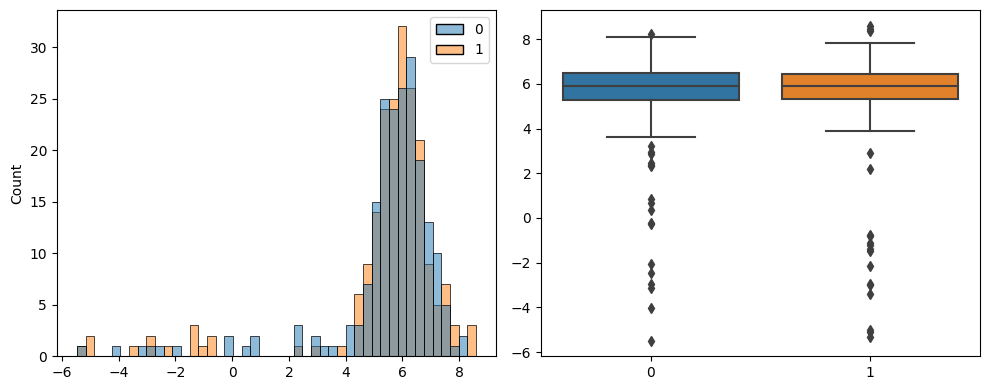

In [ ]:
from pyod.utils.data import generate_data

import matplotlib.pyplot as plt
import seaborn as sns

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.boxplot(data=X_train, ax=axes[1])
sns.histplot(X_train, ax=axes[0])
plt.tight_layout()

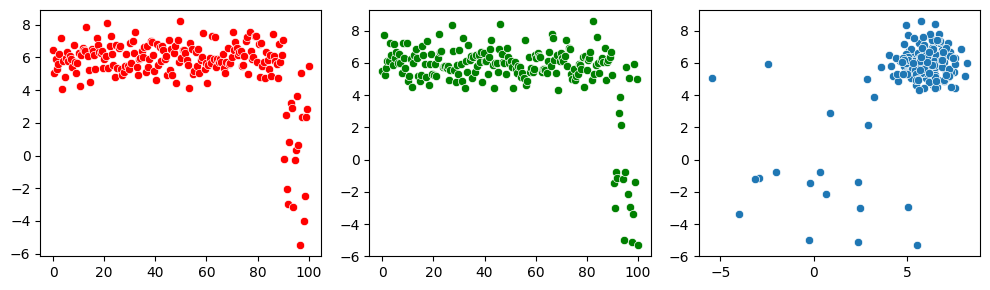

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

sns.scatterplot(y=X_train[:,0], x=np.linspace(0,100,200), ax=axes[0], color='r')
sns.scatterplot(y=X_train[:,1], x=np.linspace(0,100,200), ax=axes[1], color='g')
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], ax=axes[2])

plt.tight_layout()

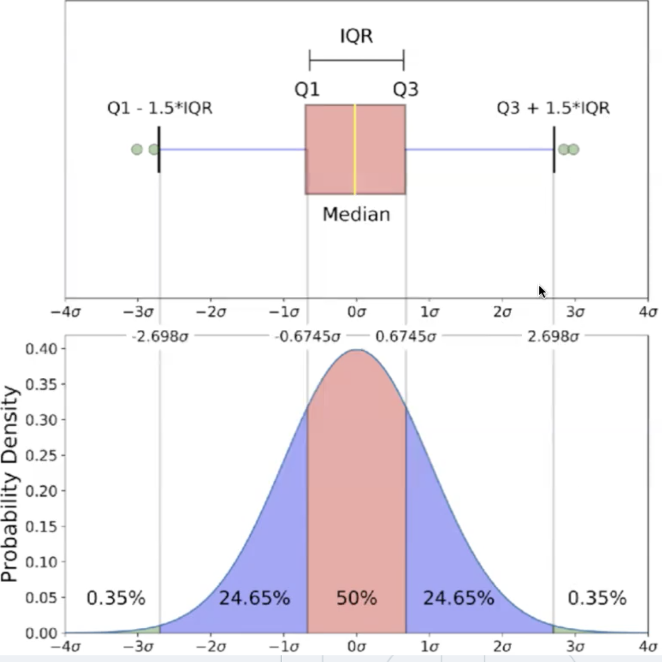

In [ ]:
# 3 sigma 99.7%
def sigma_outlier(X, y=False, threshold=3):
    sd = np.std(X, axis=0)
    mean = np.mean(X, axis=0)
    upper = mean + threshold * sd
    lower = mean - threshold * sd
    idx = np.where((X < lower) | (X > upper))[0]
    mask = np.ones(X.shape[0], dtype=int)
    mask[idx] = -1
    if y:
        return X[mask == 1], y[mask == 1]
    return X[mask == 1]

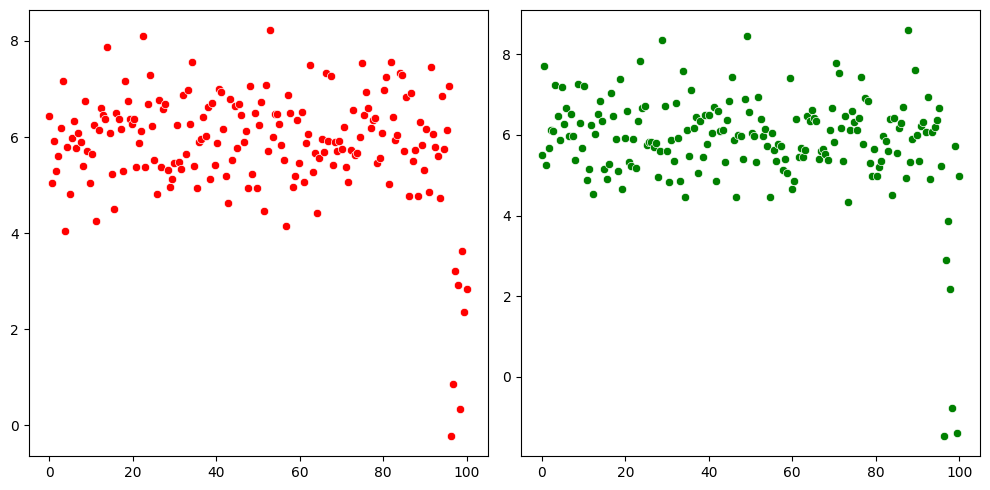

In [ ]:
X = sigma_outlier(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(y=X[:,0], x=np.linspace(0,100,X.shape[0]), ax=axes[0], color='r')
sns.scatterplot(y=X[:,1], x=np.linspace(0,100,X.shape[0]), ax=axes[1], color='g')

plt.tight_layout()

In [ ]:
# IQR 99.3%
def iqr_outlier(X, y=False):
    Q3 = np.quantile(X, 0.75, axis=0)
    Q1 = np.quantile(X, 0.25, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    idx = np.where((X < lower) | (X > upper))[0]
    mask = np.ones(X.shape[0], dtype=int)
    mask[idx] = -1
    if y:
        return X[mask == 1], y[mask == 1]
    return X[mask == 1]

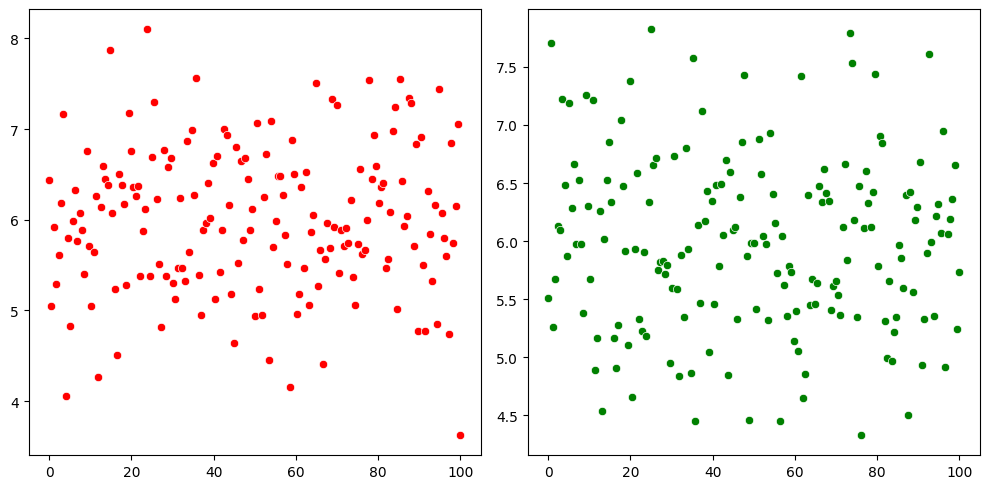

In [ ]:
X = iqr_outlier(X_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.scatterplot(y=X[:,0], x=np.linspace(0,100,X.shape[0]), ax=axes[0], color='r')
sns.scatterplot(y=X[:,1], x=np.linspace(0,100,X.shape[0]), ax=axes[1], color='g')

plt.tight_layout()

# KNN method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs



In [ ]:
n_groups=3
n_samples=160

# X, y = make_moons(n_samples=100, random_state=42)
X, y = make_blobs(n_samples=n_samples, centers=n_groups)


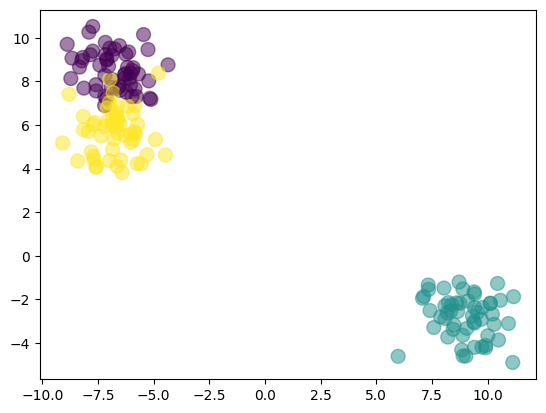

In [ ]:
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()

In [ ]:
#подготовка тестового и тренировочного наборов данных
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
#подключение классификатора KNN
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=5

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  96.875


In [ ]:
y_pred = model.predict(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [ ]:
!pip install mlxtend --upgrade --no-deps -q

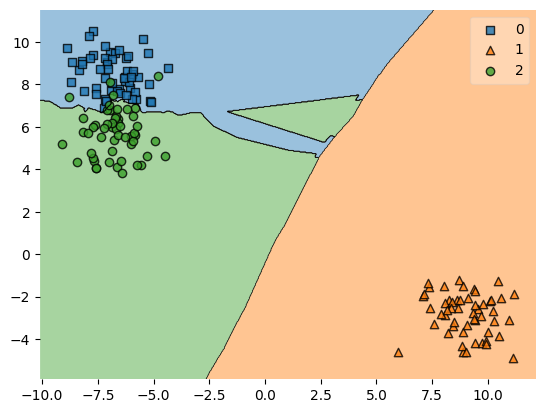

In [ ]:

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model)
plt.show()

# KNN method, try k = 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=3

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  93.75


# Find optimal K using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# Создание списка значений k, которые вы хотите оценить
k_values = [3, 5, 7, 9, 10, 11, 20]

# Инициализация списка для сохранения средних оценок точности для каждого значения k
mean_scores = []

# Перебор значений k
for k in k_values:
    # Создание модели k-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=k)

    # Вычисление средней оценки точности с использованием перекрестной проверки
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # cv=5 означает 5-кратную перекрестную проверку
    mean_scores.append(np.mean(scores))

# Вывод результатов
for k, score in zip(k_values, mean_scores):
    print("k =", k, "Mean Accuracy:", score)






k = 3 Mean Accuracy: 0.95
k = 5 Mean Accuracy: 0.95
k = 7 Mean Accuracy: 0.95625
k = 9 Mean Accuracy: 0.9625
k = 10 Mean Accuracy: 0.9625
k = 11 Mean Accuracy: 0.9625
k = 20 Mean Accuracy: 0.95625
